# C3.ai COVID-19 Data Lake Quickstart in Python

Loading Dependencies Below:

In [436]:
import requests
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
from scipy.stats import gamma
import numpy as np

Ensuring that the most recent version of pandas (>= 1.0.0)

In [11]:
print("pandas version", pd.__version__)
assert pd.__version__[0] >= "1", "To use this notebook, upgrade to the newest version of pandas. See https://pandas.pydata.org/pandas-docs/stable/getting_started/install.html for details."

pandas version 1.0.5


<a id="helpers"></a>
## Helper methods for accessing the API

The helper methods in `c3aidatalake.py` convert a JSON response from the C3.ai APIs to a Pandas DataFrame. You may wish to view the code in `c3aidatalake.py` before running the code below. 

`c3aidatalake.py` is a API file provided by C3.ai

In [35]:
import c3aidatalake as dl

## Notes: API Call

* include parameter is a powerful way to fetch data from multiple C3.ai Types
    - To join data from two C3.ai Types, amke a fetch API call to one C3.ai Types and use `include` in the request body to refer to the second C3.ai Type
* API calls suppored:
    - `fetch` for all C3.ai Types presented
    - `evalmetrics` for OutbreakLocation
    - `getprojectionhistory` for OutbreakLocation
    - `getarticlemetadata` for BiblioEntry
    - `getimageurls` for Diagnosis
    - `allversionsforpolicy` for LocationPolicySummary
* Use `POST` requests to access the APIs
* `FETCH` has limits less than 2000 rows, use `offset` parameter to fetch more rows


# How are Rural Counties Being Affected by the Pandemic?

### PopulationData - US overall
Note: Including all 50 states and the District of Columbia Only

Using Fetch: 

`{
  "spec": {
    "filter": "string",
    "include": "string",
    "limit": 0,
    "offset": 0
  }
}`

Using EvalMetrics:

`( 
    "c3object_name",
    {
        "spec" : {
            "ids" : list(ind_region_datasources),
            "expressions" : ["data_repository"],
            "start" : "start_date",
            "end" : "end_state",
            "interval" : "time_period",
        }
    },
    get_all = True
)`

In [271]:
locations_p1 = c3aidatalake.fetch(
    "outbreaklocation",
    {
        "spec" : {
            "filter" : "locationType == 'county' && contains(id, '_UnitedStates') \
            && !contains(id, 'Outof') && !contains(id, 'Guam') && \
            !contains(id, 'Northern Mariana Islands') && !contains(id, 'Virgin Islands') \
            && !contains(id, 'PuertoRico')"
        }
    }
)

locations_p2 = c3aidatalake.fetch(
    "outbreaklocation",
    {
        "spec" : {
            "filter" : "locationType == 'county' && contains(id, '_UnitedStates') \
            && !contains(id, 'Outof') && !contains(id, 'Guam') && \
            !contains(id, 'Northern Mariana Islands') && !contains(id, 'Virgin Islands') \
            && !contains(id, 'PuertoRico')",
            "offset" : 2000
        }
    }
)

In [272]:
# combining both dataset fetchs for a whole dataset
counties_df = pd.concat([locations_p1, locations_p2])
counties_df = counties_df.reset_index(drop = True)
counties_df

,hospitalIcuBeds,hospitalStaffedBeds,hospitalLicensedBeds,latestTotalPopulation,populationOfAllChildren,latestLaborForce,latestEmployedPopulation,latestUnemployedPopulation,latestUnemploymentRate,laborForceOfAllChildren,locationType,populationCDS,id,name,typeIdent,location.value.id,location.timestamp,fips.id
0,6.0,25.0,25.0,24527.0,24527.0,10191.0,9567.0,624.0,6.123050,10191.0,county,24527.0,Abbeville_SouthCarolina_UnitedStates,Abbeville,EP_LOC,Abbeville_SouthCarolina_UnitedStates,2020-11-02T00:00:00Z,45001
1,7.0,171.0,186.0,62045.0,62045.0,24128.0,22397.0,1731.0,7.174237,24128.0,county,62045.0,Acadia_Louisiana_UnitedStates,Acadia,EP_LOC,Acadia_Louisiana_UnitedStates,2020-11-02T00:00:00Z,22001
2,10.0,46.0,52.0,32316.0,32316.0,16786.0,15819.0,967.0,5.760753,16786.0,county,32316.0,Accomack_Virginia_UnitedStates,Accomack,EP_LOC,Accomack_Virginia_UnitedStates,2020-11-02T00:00:00Z,51001
3,97.0,1195.0,1305.0,481587.0,481587.0,259772.0,249394.0,10378.0,3.995042,259772.0,county,481587.0,Ada_Idaho_UnitedStates,Ada,EP_LOC,Ada_Idaho_UnitedStates,2020-11-02T00:00:00Z,16001
4,4.0,25.0,25.0,7152.0,7152.0,3852.0,3690.0,162.0,4.205607,3852.0,county,7152.0,Adair_Iowa_UnitedStates,Adair,EP_LOC,Adair_Iowa_UnitedStates,2020-11-02T00:00:00Z,19001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3147,42.0,447.0,456.0,213787.0,213787.0,90783.0,75928.0,14855.0,16.363196,90783.0,county,213787.0,Yuma_Arizona_UnitedStates,Yuma,EP_LOC,Yuma_Arizona_UnitedStates,2020-11-02T00:00:00Z,4027
3148,6.0,30.0,30.0,10019.0,10019.0,4805.0,4664.0,141.0,2.934443,4805.0,county,10019.0,Yuma_Colorado_UnitedStates,Yuma,EP_LOC,Yuma_Colorado_UnitedStates,2020-11-02T00:00:00Z,08125
3149,NaN,NaN,NaN,14179.0,14179.0,4938.0,4381.0,557.0,11.279870,4938.0,county,14179.0,Zapata_Texas_UnitedStates,Zapata,EP_LOC,Zapata_Texas_UnitedStates,2020-11-02T00:00:00Z,48505
3150,NaN,NaN,NaN,11840.0,11840.0,3305.0,2848.0,457.0,13.827534,3305.0,county,11840.0,Zavala_Texas_UnitedStates,Zavala,EP_LOC,Zavala_Texas_UnitedStates,2020-11-02T00:00:00Z,48507


In [273]:
# all the tables counties names
df_col_names = counties_df.columns.tolist()
df_col_names

['hospitalIcuBeds',
 'hospitalStaffedBeds',
 'hospitalLicensedBeds',
 'latestTotalPopulation',
 'populationOfAllChildren',
 'latestLaborForce',
 'latestEmployedPopulation',
 'latestUnemployedPopulation',
 'latestUnemploymentRate',
 'laborForceOfAllChildren',
 'locationType',
 'populationCDS',
 'id',
 'name',
 'typeIdent',
 'location.value.id',
 'location.timestamp',
 'fips.id']

In [274]:
#sanity check that ['id'] and the ['location.value.id'] are the same column -- they are
print(sum(counties_df['id'] != counties_df['location.value.id']))

0


In [275]:
#getting State and County and County Equivalent names from the ['id'] string
full_names = counties_df['id'].tolist()
split_names = [str(full_names[x]).split("_") for x in range(len(full_names))]
county_names = [split_names[x][0] for x in range(len(split_names))]
state_names = [split_names[x][1] for x in range(len(split_names))]

In [402]:
# adding it to the table
counties_df["county"] = county_names
counties_df["state"] = state_names

# sanity check - 50 states plus 1 for District of Columbia
counties_df['state'].nunique()==51

True

In [279]:
# check for discrepancies in naming convention between the 'name' column
print(sum(counties_df['name'] != counties_df['county']))

# isolating discrepancies from table
counties_df[counties_df['name'] != counties_df['county']]

54


,hospitalIcuBeds,hospitalStaffedBeds,hospitalLicensedBeds,latestTotalPopulation,populationOfAllChildren,latestLaborForce,latestEmployedPopulation,latestUnemployedPopulation,latestUnemploymentRate,laborForceOfAllChildren,locationType,populationCDS,id,name,typeIdent,location.value.id,location.timestamp,fips.id,county,state
159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,county,252042.0,"BeaverCounty,GarfieldCounty,IronCounty,KaneCou...","Beaver County, Garfield County, Iron County, K...",EP_LOC,"BeaverCounty,GarfieldCounty,IronCounty,KaneCou...",2020-05-29T05:14:04Z,NaN,"BeaverCounty,GarfieldCounty,IronCounty,KaneCou...",Utah
252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,county,186818.0,"BoxElderCounty,CacheCounty,Rich_Utah_UnitedStates","Box Elder County, Cache County, Rich County, U...",EP_LOC,"BoxElderCounty,CacheCounty,Rich_Utah_UnitedStates",2020-05-29T05:14:04Z,NaN,"BoxElderCounty,CacheCounty,Rich",Utah
273,NaN,NaN,NaN,836.0,836.0,538.0,518.0,20.0,3.717472,538.0,county,836.0,BristolBay_Alaska_UnitedStates,Bristol Bay,EP_LOC,BristolBay_Alaska_UnitedStates,2020-11-02T00:00:00Z,2060,BristolBay,Alaska
386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,county,40229.0,"CarbonCounty,EmeryCounty,Grand_Utah_UnitedStates","Carbon County, Emery County, Grand County, Uta...",EP_LOC,"CarbonCounty,EmeryCounty,Grand_Utah_UnitedStates",2020-05-29T05:14:04Z,NaN,"CarbonCounty,EmeryCounty,Grand",Utah
452,6.0,37.0,37.0,9292.0,9292.0,3993.0,3630.0,363.0,9.090909,3993.0,county,9292.0,CharlesMix_SouthDakota_UnitedStates,Charles Mix,EP_LOC,CharlesMix_SouthDakota_UnitedStates,2020-11-02T00:00:00Z,46023,CharlesMix,SouthDakota
605,NaN,NaN,NaN,17370.0,17370.0,NaN,NaN,NaN,NaN,NaN,county,17370.0,ColonialHeights_Virginia_UnitedStates,Colonial Heights,EP_LOC,ColonialHeights_Virginia_UnitedStates,2020-11-02T00:00:00Z,51570,ColonialHeights,Virginia
791,407.0,3077.0,4098.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,county,705749.0,DistrictofColumbia_DistrictofColumbia_UnitedSt...,District of Columbia,EP_LOC,DistrictofColumbia_DistrictofColumbia_UnitedSt...,2020-11-02T00:00:00Z,11001,DistrictofColumbia,DistrictofColumbia
821,NaN,NaN,NaN,218195.0,218195.0,NaN,NaN,NaN,NaN,NaN,county,218195.0,DoñaAna_NewMexico_UnitedStates,"Doña Ana County, New Mexico, United States",EP_LOC,DoñaAna_NewMexico_UnitedStates,2020-03-30T22:52:45,NaN,DoñaAna,NewMexico
827,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,county,NaN,"Dukes,Nantucket_Massachusetts_UnitedStates","Dukes County, Nantucket County, Massachusetts,...",EP_LOC,"Dukes,Nantucket_Massachusetts_UnitedStates",2020-05-23T20:22:40Z,NaN,"Dukes,Nantucket",Massachusetts
828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,county,NaN,"DukesCounty,Nantucket_Massachusetts_UnitedStates","Dukes County, Nantucket County, Massachusetts,...",EP_LOC,"DukesCounty,Nantucket_Massachusetts_UnitedStates",2020-05-29T05:17:38Z,NaN,"DukesCounty,Nantucket",Massachusetts


In the table above we see inconsistencies in the `name` column with some named with commas and others with underscores. We will be using the derived `county` column for the analysis for consistency with the state.

### Defining Rural and Urban Health

I used a simplified version of the US Census Bureau's first [definition of rural health](https://www.hrsa.gov/rural-health/about-us/definition/index.html), which considered any county with anywhere between 2,500 and 50,000 individuals residing in rural counties. For the purpose of this EDA, I decided to define rural as any area with fewer than 50,000 individuals.

In [389]:
# add indicator for urban vs rural counties
rural_urban = np.where(counties_df['populationCDS'] >= 50000, "urban", "rural")
counties_df['rural_urban'] = rural_urban
# saving as csv file for earlier access
counties_df.to_csv('outbreaklocation_by_county.csv')
#subset my dataset for easier data visualization
rvu = counties_df[['county', 'state', 'fips.id', 'populationCDS','rural_urban']]
rvu

,county,state,fips.id,populationCDS,rural_urban
0,Abbeville,SouthCarolina,45001,24527.0,rural
1,Acadia,Louisiana,22001,62045.0,urban
2,Accomack,Virginia,51001,32316.0,rural
3,Ada,Idaho,16001,481587.0,urban
4,Adair,Iowa,19001,7152.0,rural
...,...,...,...,...,...
3147,Yuma,Arizona,4027,213787.0,urban
3148,Yuma,Colorado,08125,10019.0,rural
3149,Zapata,Texas,48505,14179.0,rural
3150,Zavala,Texas,48507,11840.0,rural


## Combining with Outbreak Data

In [ ]:
["JHU_ConfirmedCases", "JHU_ConfirmedDeaths", "JHU_ConfirmedRecoveries"]

In [287]:
# Total number of confirmed cases, deaths, and recoveries in Santa Clara, California
today = pd.Timestamp.now().strftime("%Y-%m-%d")

county_cases = c3aidatalake.evalmetrics(
    "outbreaklocation",
    {
        "spec" : {
            "ids" : list(counties_df['id']),
            "expressions" : ["NYT_ConfirmedCases"],
            "start" : "2020-09-01",
            "end" : today,
            "interval" : "MONTH",
        }
    },
    get_all = True
)

county_cases

,dates,Abbeville_SouthCarolina_UnitedStates.NYT_ConfirmedCases.data,Abbeville_SouthCarolina_UnitedStates.NYT_ConfirmedCases.missing,Acadia_Louisiana_UnitedStates.NYT_ConfirmedCases.data,Acadia_Louisiana_UnitedStates.NYT_ConfirmedCases.missing,Adair_Iowa_UnitedStates.NYT_ConfirmedCases.data,Adair_Iowa_UnitedStates.NYT_ConfirmedCases.missing,Adair_Oklahoma_UnitedStates.NYT_ConfirmedCases.data,Adair_Oklahoma_UnitedStates.NYT_ConfirmedCases.missing,Adams_Idaho_UnitedStates.NYT_ConfirmedCases.data,...,York_SouthCarolina_UnitedStates.NYT_ConfirmedCases.data,York_SouthCarolina_UnitedStates.NYT_ConfirmedCases.missing,York_Pennsylvania_UnitedStates.NYT_ConfirmedCases.data,York_Pennsylvania_UnitedStates.NYT_ConfirmedCases.missing,Young_Texas_UnitedStates.NYT_ConfirmedCases.data,Young_Texas_UnitedStates.NYT_ConfirmedCases.missing,Zavala_Texas_UnitedStates.NYT_ConfirmedCases.data,Zavala_Texas_UnitedStates.NYT_ConfirmedCases.missing,Ziebach_SouthDakota_UnitedStates.NYT_ConfirmedCases.data,Ziebach_SouthDakota_UnitedStates.NYT_ConfirmedCases.missing
0,2020-09-01,591,0,2969,0,76,0,639,0,29,...,5454,0,4941,0,332,0,388,0,63,0
0,2020-10-01,760,0,3169,0,178,0,850,0,58,...,6777,0,6716,0,620,0,553,0,87,0
0,2020-11-01,0,100,0,100,0,100,0,100,0,...,0,100,0,100,0,100,0,100,0,100


In [298]:
county_cases = county_cases.set_index('dates').T
county_cases.to_csv('raw_county_cases09-11.csv')

In [310]:
cc_updated = county_cases.reset_index()
#getting State and County and County Equivalent names from the ['index'] string
cc_full_names = cc_updated['index'].tolist()
cc_split_names = [str(cc_full_names[x]).split("_") for x in range(len(cc_full_names))]
cc_county_names = [cc_split_names[x][0] for x in range(len(cc_split_names))]
cc_state_names = [cc_split_names[x][1] for x in range(len(cc_split_names))]
# adding it to the data frame
cc_updated["county"] = cc_county_names
cc_updated["state"] = cc_state_names

dates,index,2020-09-01 00:00:00,2020-10-01 00:00:00,2020-11-01 00:00:00,county,state
0,Abbeville_SouthCarolina_UnitedStates.NYT_Confi...,591,760,0,Abbeville,SouthCarolina
1,Abbeville_SouthCarolina_UnitedStates.NYT_Confi...,0,0,100,Abbeville,SouthCarolina
2,Acadia_Louisiana_UnitedStates.NYT_ConfirmedCas...,2969,3169,0,Acadia,Louisiana
3,Acadia_Louisiana_UnitedStates.NYT_ConfirmedCas...,0,0,100,Acadia,Louisiana
4,Adair_Iowa_UnitedStates.NYT_ConfirmedCases.data,76,178,0,Adair,Iowa
...,...,...,...,...,...,...
6299,Young_Texas_UnitedStates.NYT_ConfirmedCases.mi...,0,0,100,Young,Texas
6300,Zavala_Texas_UnitedStates.NYT_ConfirmedCases.data,388,553,0,Zavala,Texas
6301,Zavala_Texas_UnitedStates.NYT_ConfirmedCases.m...,0,0,100,Zavala,Texas
6302,Ziebach_SouthDakota_UnitedStates.NYT_Confirmed...,63,87,0,Ziebach,SouthDakota


In [387]:
# keeping only data rows, not missing data rows
cc_data = cc_updated[cc_updated['index'].str.endswith(".data")]

# renaming cols
key = [cc_data.columns[i] for i in range(6)]
value = ['id', 'sept_2020_cases', 'oct_2020_cases', 'nov_2020_cases', 'county', 'state']
col_dict = {k:v for (k,v) in zip(key,value)}
# subsetting df for county,state, and only september and october case counts because just started november (as of 11.4.2020)
ccase_septoct = cc_data.rename(columns = col_dict).iloc[:, [-2,-1,1,2]]

In [421]:
pd.merge?

In [478]:
# merging the rvu (rural versus urban) table and the county cases in sept oct (ccase_septoct)
ru_df = rvu.merge(ccase_septoct, 'inner', on = ['county', 'state'])
# adding column for proportion of population infected, percent increase over month
ru_df['sept_percent_cases'] = ru_df["sept_2020_cases"]/ru_df['populationCDS']*100
ru_df['oct_percent_cases'] = ru_df["oct_2020_cases"]/ru_df['populationCDS']*100
ru_df['percent_change'] = (ru_df["oct_2020_cases"]-ru_df["sept_2020_cases"])/ru_df['populationCDS']*100
ru_df

,county,state,fips.id,populationCDS,rural_urban,sept_2020_cases,oct_2020_cases,sept_percent_cases,oct_percent_cases,percent_change
0,Abbeville,SouthCarolina,45001,24527.0,rural,591,760,2.40959,3.09863,0.689037
1,Acadia,Louisiana,22001,62045.0,urban,2969,3169,4.78524,5.10758,0.322347
2,Accomack,Virginia,51001,32316.0,rural,1182,1223,3.65763,3.7845,0.126872
3,Ada,Idaho,16001,481587.0,urban,13129,17326,2.72619,3.59769,0.871494
4,Adair,Iowa,19001,7152.0,rural,76,178,1.06264,2.48881,1.42617
...,...,...,...,...,...,...,...,...,...,...
3147,Yuma,Arizona,4027,213787.0,urban,12730,13797,5.95452,6.45362,0.499095
3148,Yuma,Colorado,08125,10019.0,rural,125,210,1.24763,2.09602,0.848388
3149,Zapata,Texas,48505,14179.0,rural,333,358,2.34854,2.52486,0.176317
3150,Zavala,Texas,48507,11840.0,rural,388,553,3.27703,4.67061,1.39358


## Visualizing Trends in Outbreak Data by Rural and Urban Settings

In [489]:
min(ru_df['populationCDS'])

86.0

In [437]:
matplotlib.colors.ListedColormap?

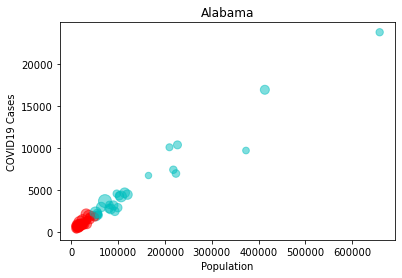

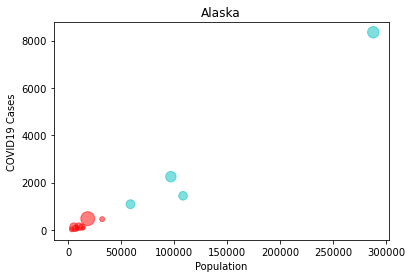

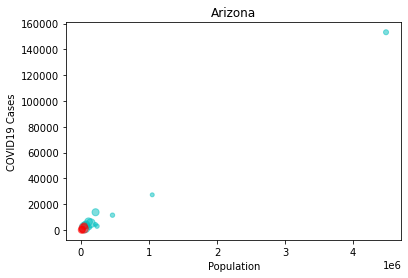

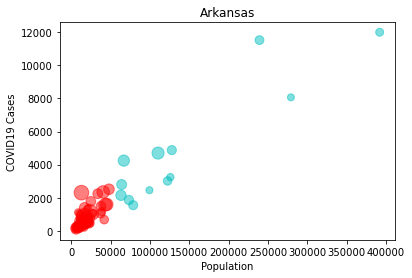

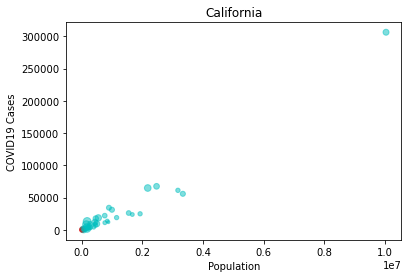

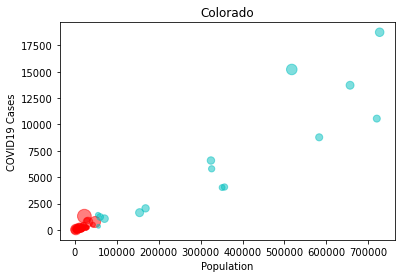

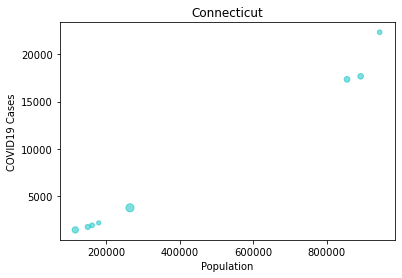

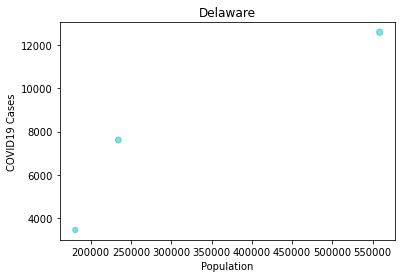

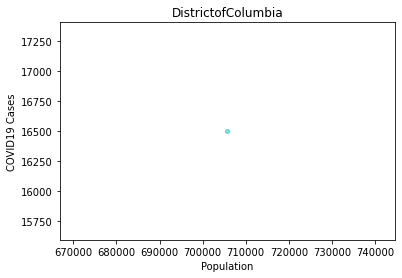

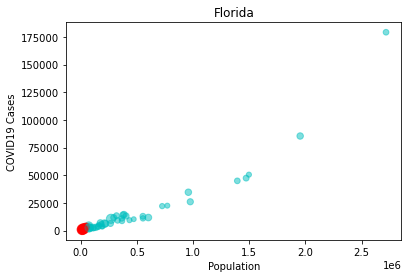

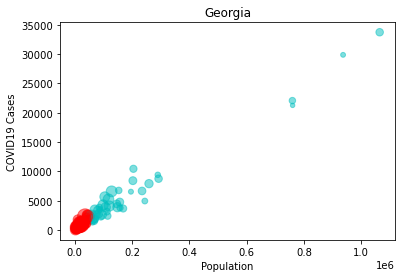

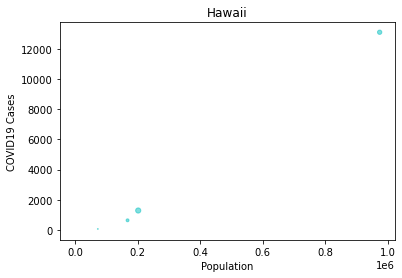

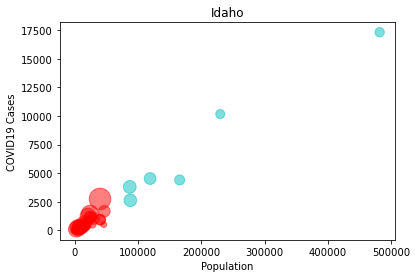

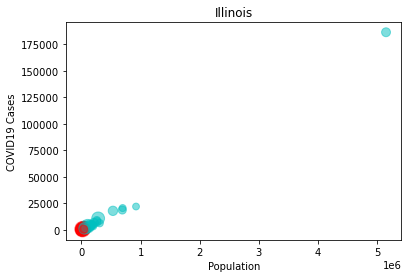

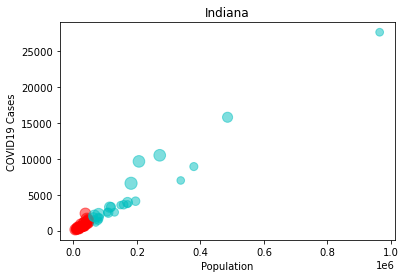

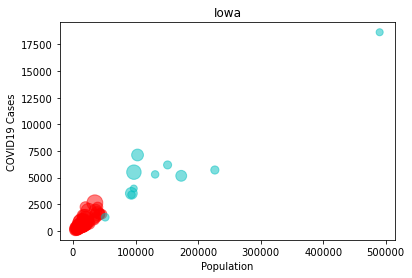

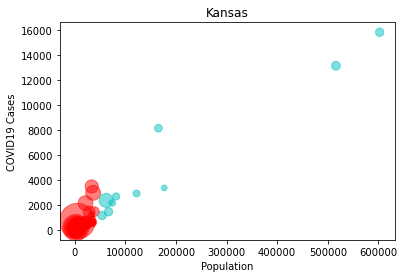

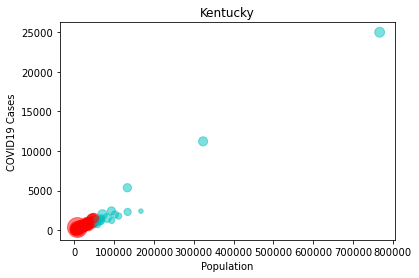

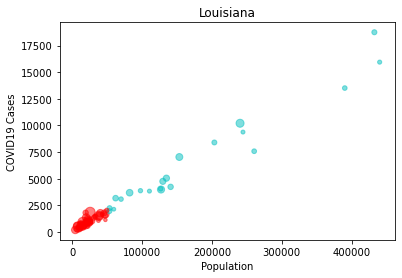

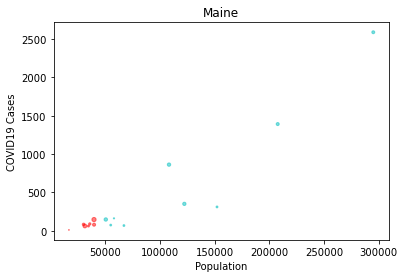

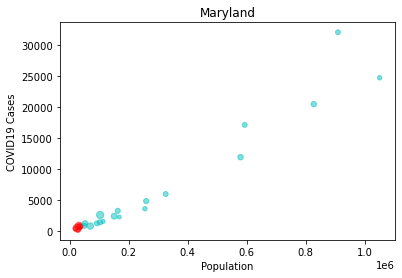

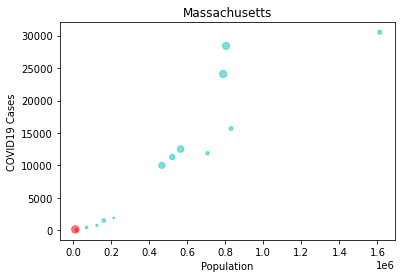

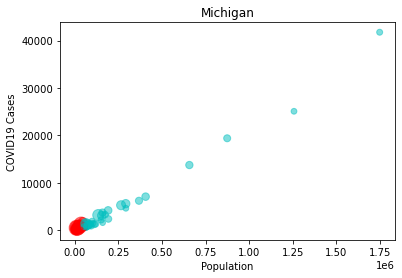

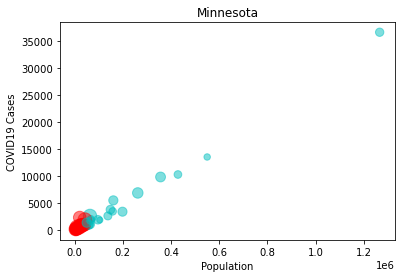

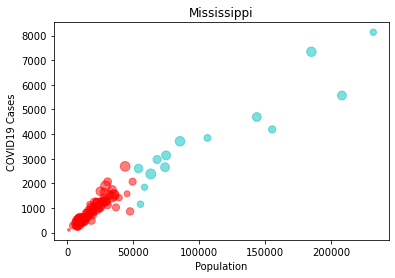

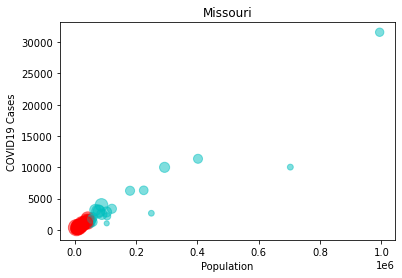

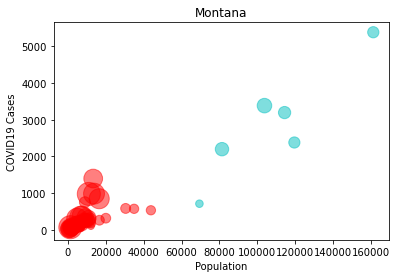

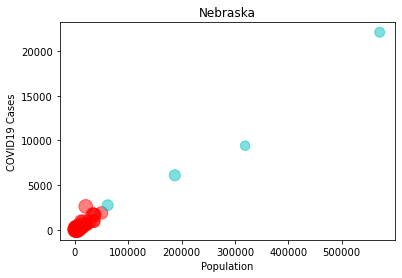

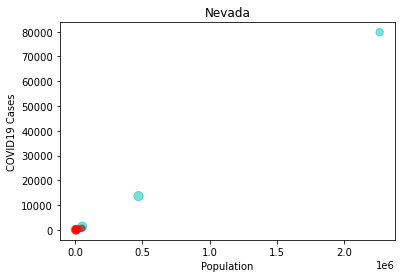

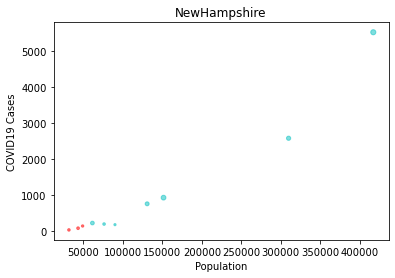

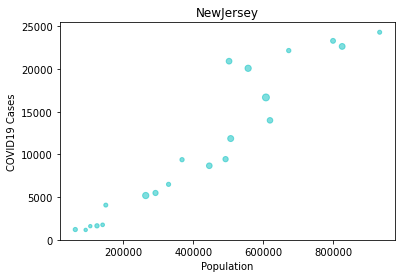

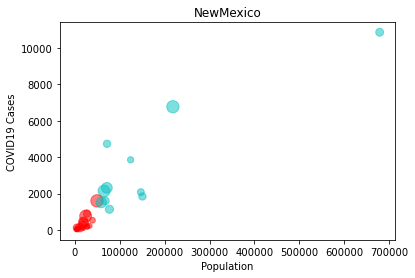

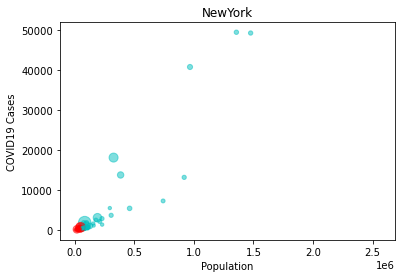

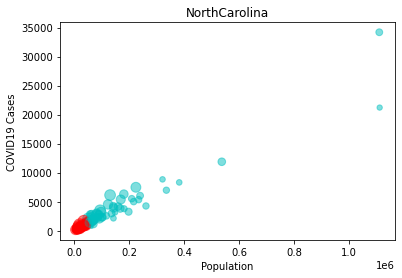

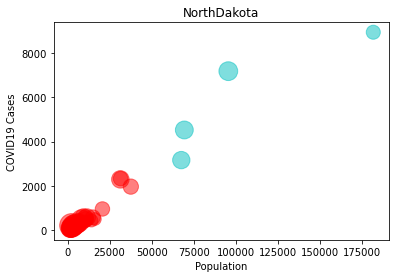

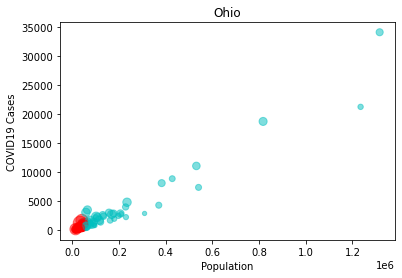

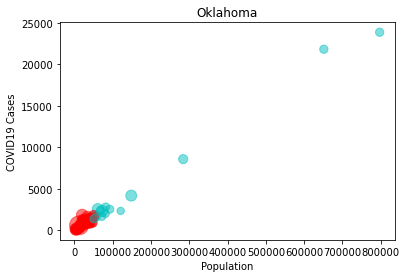

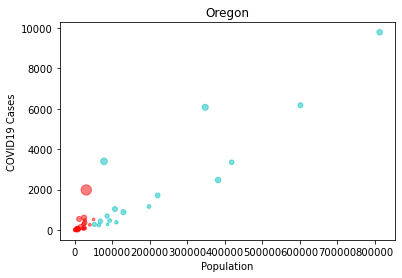

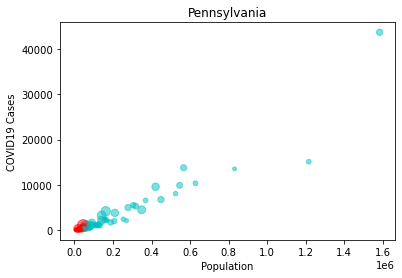

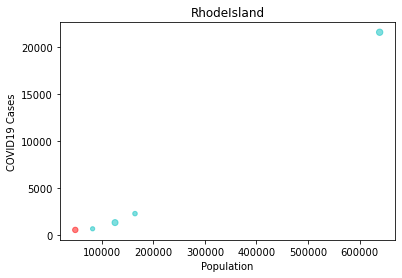

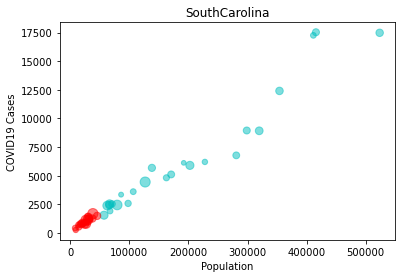

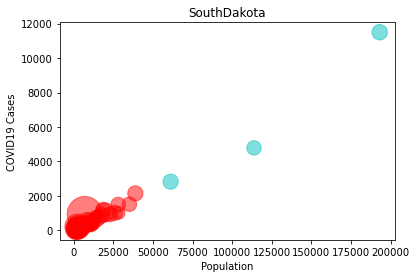

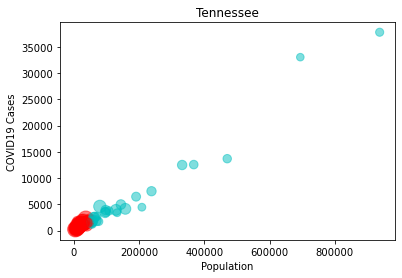

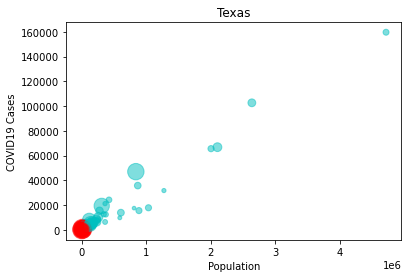

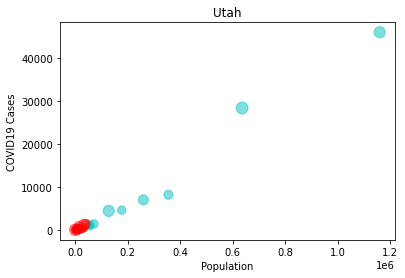

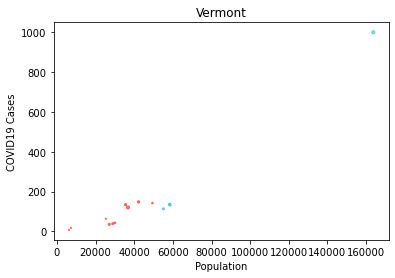

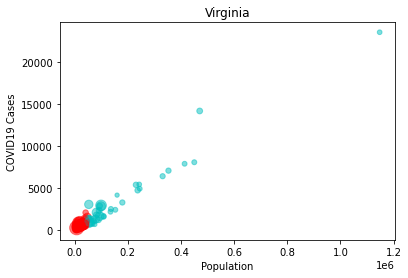

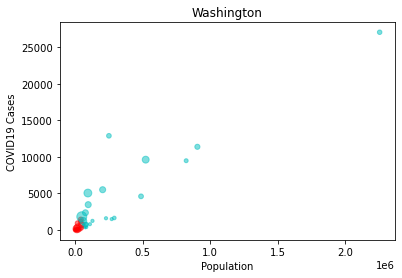

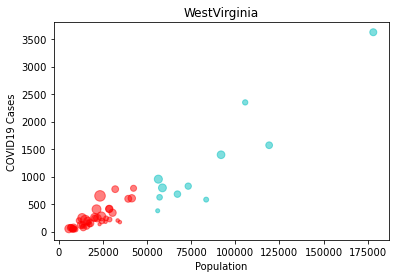

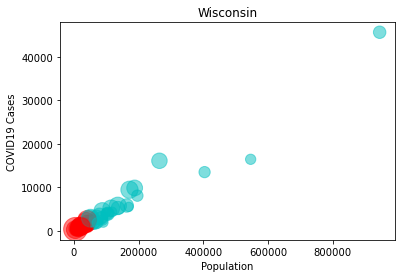

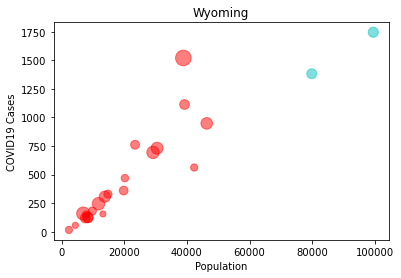

In [494]:
# fig = plt.figure(figsize = (100,300))

# fig, ax = plt.subplots(1, len(columns), figsize = (20, 5))

# for idx, col in enumerate(columns, 0):
#     ax[idx].plot(df['Cal'], df[col], 'o')
#     ax[idx].set_xlabel('Cal')
#     ax[idx].set_title(col)
    
city_type = {'rural': 'r', 'urban': 'c'}
for i in range(51):
    state_df = ru_df[ru_df['state']==np.unique(ru_df.state)[i]]
    plt.scatter(x='populationCDS', y = 'oct_2020_cases',
                data = state_df,
                c=state_df['rural_urban'].map(city_type), 
               s = list(state_df['percent_change']*100), alpha = 0.5)
    plt.title(np.unique(ru_df.state)[i])
    plt.xlabel('Population')
    plt.ylabel('COVID19 Cases')
    plt.show()